# CH 3 - Adding Layers

- P 59 - 71

---

- Background
- Training Data
- Dense Layer Class

---
---

In [35]:
import numpy as np

## Background

- NN become "deep" when they have 2 or more **hidden layers**
- Why "**hidden**" : as a scientist, I see data as it's fed into the input layer and the resulting data coming from the output layer but don't see the in between (although I can still access the values)
- Hidden shape (#output nodes x #input nodes)
- Bias shape (1 x #neurons in next layer (also known as #rows in next layer))
- Can have multiple **hidden layers**
    - After the 1st hidden layer, $ \exists $ an output which will be passed to the next (hidden) layer
    - ie : 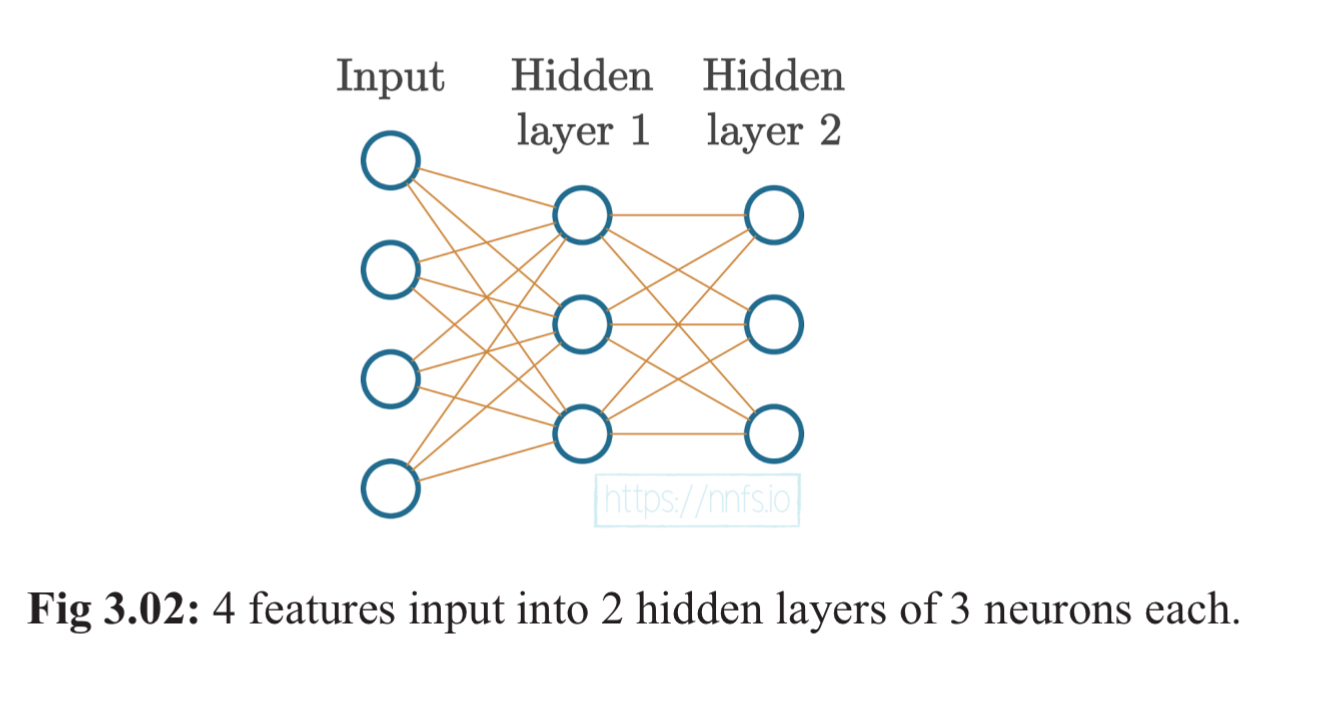

In [34]:
inputs = [
          [1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]
         ]
print("inputs shape : ", np.shape(inputs))
weights = [
           [0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]
          ]
print("weights shape : ", np.shape(weights))
biases = [2.0, 3.0, 0.5]
print("biases shape : ", np.shape(biases))

weights2 = [
           [0.1, -0.14, 0.5],
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]
          ]

print("weights2 shape : ", np.shape(weights2))
biases2 = [-1.0, 2.0, -0.5]
print("biases2 shape : ", np.shape(biases2))

# layer_outputs = np.dot(weights, inputs) + biases
layer1_outputs = np.dot(inputs, np.array(weights).T)
layer1_outputs += biases

layer2_outputs = np.dot(layer1_outputs, np.transpose(np.array(weights2))) + biases2
print(layer2_outputs)

inputs shape :  (3, 4)
weights shape :  (3, 4)
biases shape :  (3,)
weights2 shape :  (3, 3)
biases2 shape :  (3,)


AttributeError: 'list' object has no attribute 'astype'

## Training Data
- Linear vs Non-Linear Data : Linear can be fit w/ or represented by a straight line while N-L cannot 
    - ie : 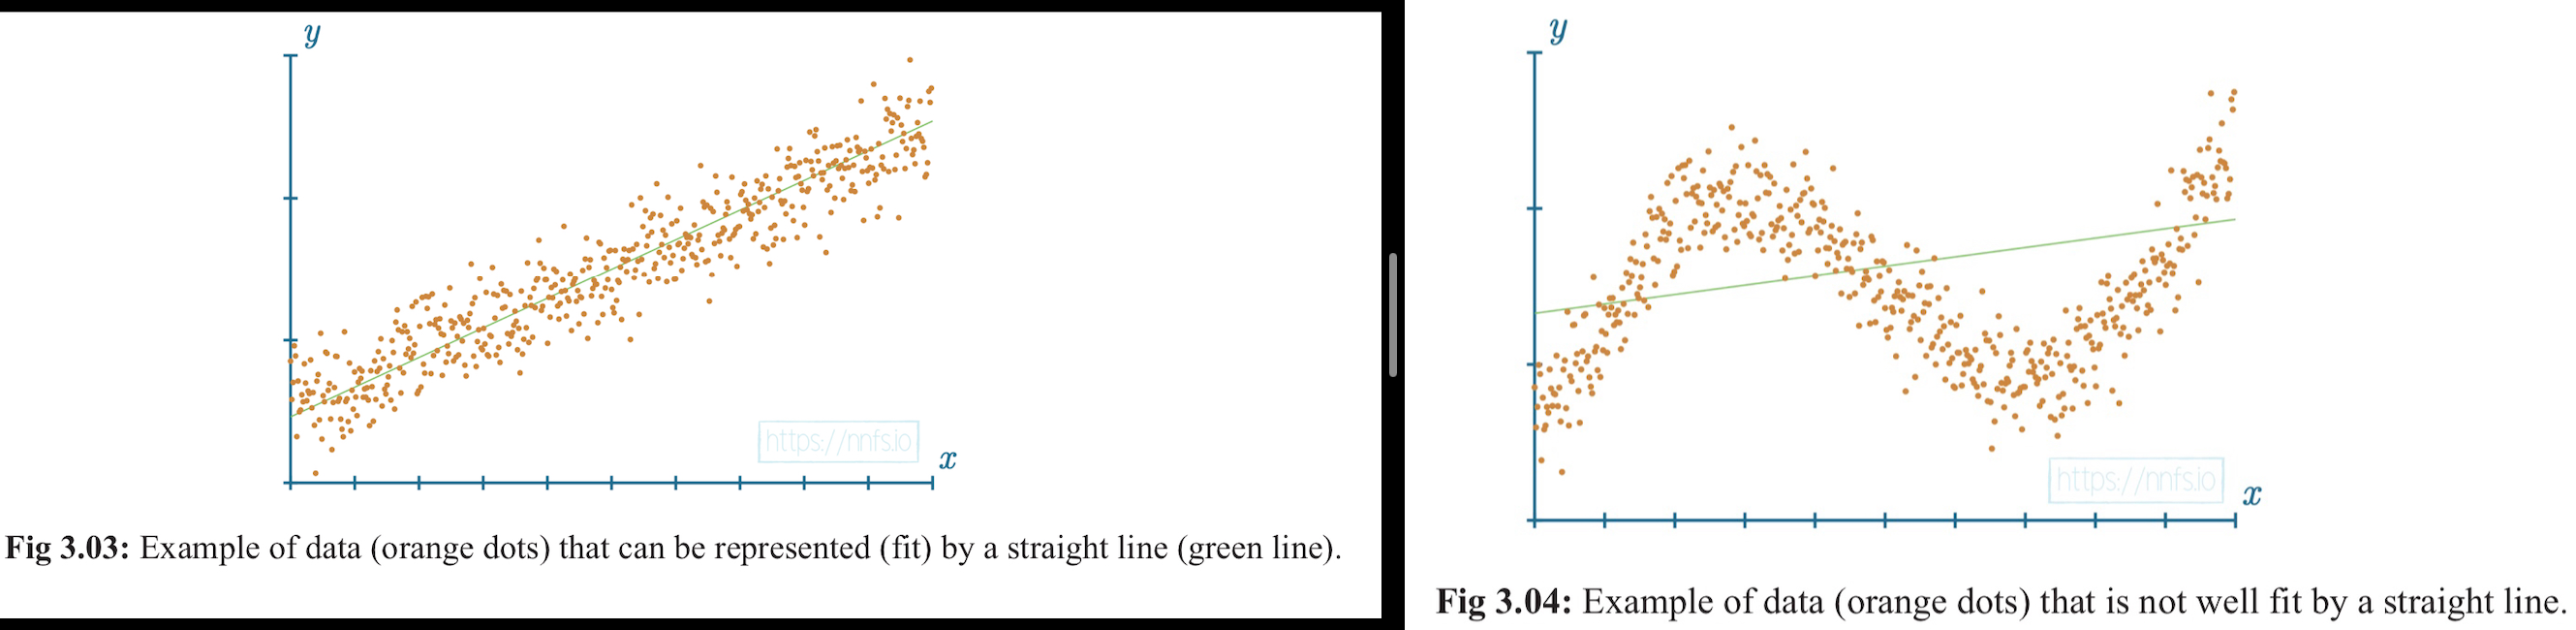
    - Linear data are very easily approxed by far simpler ML models than NNs
    - Some ML models are well for N-L data
- nnfs [a package w/ funcs that we can use to create data]
    - Only using bc it's convenience; Usually have actual data

In [25]:
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

- nnfs.init()
    - Sets the random seed to 0
    - Creates a float32 dtype
    - Overrides the original dot product from NumPy
    - Why the above 3? For repeatability as in to generate the same plot (to compare w/ his) instead of randomizing
- [spiral_data() func](https://github.com/Sentdex/nnfs/blob/master/nnfs/datasets/spiral.py)
    - Each dot is a feature w/ coords (x-axis, y-axis)
        - feature $\equiv$ sample
        - 2 coords : 1 feature
        - 1 feature contains 2 coords
        
    - NN can't see the colors or class encodings
        - y = colors & classes would be assigned like : 0 (red) 1 (blue) 2 (green)
- plt.scatter(x=1st col, y=2nd col)

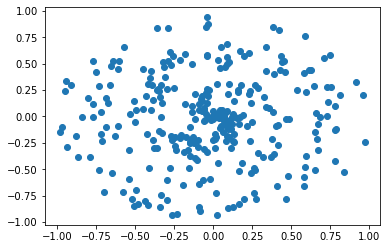

In [26]:
nnfs.init()
 
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

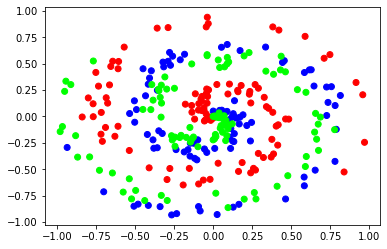

In [27]:
# Each color is a different class
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')

# Dense Layer Class
- Dense layer $\equiv$ **fully-connected** or **fc** [**all** neurons in first hidden layer connect to all neurons in the next layer]
- ! densely connected [**! all** neurons from the first hidden layer connects to all neurons in the next layer]
- def__init__ takes in #input nodes and #outputs
    - random.randn and zeros both take in (#row, #cols) to produce the output shape
        - r.r : Gaussian distribution w/ a 0 mean and variance of 1 to generate (+) and (-) #s centered at 0 and w/ the mean close to 0
    - Weights shape (#input nodes x #neurons in next layer)
        - 0.01 to generate #s that are a couple of magnitudes smaller; if remove, it'll take longer to train
    - Bias shape (1 x #neurons in next layer)
- **Forward pass** [pass data from beginning of NN to end]
    - Inputs shape (#total samples x #input nodes) 

In [22]:
nnfs.init()

# Dense layer
class Layer_Dense:
    
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        print("self.weights shape : ", np.shape(self.weights))
        # Row vector 
        self.biases = np.zeros((1, n_neurons))
        print("self.biases shape : ", np.shape(self.biases))
    
    # Forward pass
    def forward(self, inputs):
        print("inputs shape : ", np.shape(inputs))
        self.output = np.dot(inputs, self.weights) + self.biases
        print("self.output shape : ", np.shape(self.output))

In [24]:
# Create dataset; samples x classes = #total samples; it's saying we have x sample for each class
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer w/ 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Call the forward func
dense1.forward(X)

# Output of 1st 5 samples starting at index 0
print(dense1.output[:5])

self.weights shape :  (2, 3)
self.biases shape :  (1, 3)
inputs shape :  (300, 2)
self.output shape :  (300, 3)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.61496298e-05 -5.70940247e-05 -1.16960771e-04]
 [-7.69893813e-05 -4.75328154e-04 -2.12466970e-04]
 [-1.19454686e-04 -6.26299181e-04 -3.77396704e-04]
 [-1.59333722e-04 -8.86327529e-04 -4.81519091e-04]]
